In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data=pd.read_csv("ex1data1.txt",header=None)
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data = np.array(data)
X=np.array([np.ones(data[:,0].shape), data[:,0]])
y=data[:,1].reshape((1,-1))
X.shape, y.shape

((2, 97), (1, 97))

In [18]:
theta=np.zeros((1,2))
theta.shape

(1, 2)

In [8]:
def J(X, y, theta):
    return np.mean((theta.dot(X)-y)**2)/2

def dJ(X, y, theta):
    m = y.shape[1]
    err = theta.dot(X)-y
    return (err.dot(X.T))/m

In [30]:
def gradient_descent(X, y, theta, lr=0.01, max_iter=1500):
    cost = J(X, y, theta)
    for i in range(max_iter):
        if not i%100: print("epoch:", i+1, "\tcost:", cost)
        if cost<=0.0001: break
        theta = theta - lr*dJ(X, y, theta)
        cost = J(X, y, theta)
    return theta, cost

In [31]:
theta=np.zeros((1,2))
theta, cost = gradient_descent(X, y, theta)

epoch: 1 	cost: 32.072733877455676
epoch: 101 	cost: 5.479975580535112
epoch: 201 	cost: 5.176152962891966
epoch: 301 	cost: 4.964362046184745
epoch: 401 	cost: 4.816725268028978
epoch: 501 	cost: 4.713809531116866
epoch: 601 	cost: 4.642068268292856
epoch: 701 	cost: 4.592058338363685
epoch: 801 	cost: 4.557197046645755
epoch: 901 	cost: 4.532895679657961
epoch: 1001 	cost: 4.515955503078914
epoch: 1101 	cost: 4.504146719537086
epoch: 1201 	cost: 4.495914965394089
epoch: 1301 	cost: 4.490176713352229
epoch: 1401 	cost: 4.48617665019146


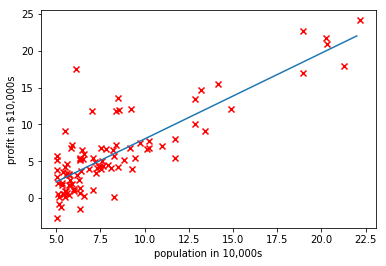

In [42]:
def plot_xy(X, y, theta):
    plt.scatter(X[1], y[0], marker='x', c='r')
    x = np.arange(5,23)
    y = theta[:,0]+theta[:,1]*x
    plt.plot(x, y)
    plt.xlabel('population in 10,000s')
    plt.ylabel('profit in $10,000s')
plot_xy(X, y, theta)    